In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import matplotlib
from metpy.plots import StationPlot
import numpy as np
from pint import UnitRegistry
import cmocean as cmo
import cmasher

C:\Users\josia\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
path = '/Users/josia/Desktop/Python/NSSL Internship/'
data = pd.read_csv(path + 'Data/P2/5s_AVG_P2_Variables.csv')

In [3]:
ureg = UnitRegistry()
data['Delta Theta_v'] = data['Delta Theta_v'].apply(ureg.parse_expression)

data['storm_rel_u'] = data['storm_rel_u'].apply(ureg.parse_expression)
data['storm_rel_v'] = data['storm_rel_v'].apply(ureg.parse_expression)
data['Baroclinic Generated Vorticity'] = data['Baroclinic Generated Vorticity'].apply(ureg.parse_expression)
data['Streamwise Vort Mag'] = data['Streamwise Vort Mag'].apply(ureg.parse_expression)
data['Crosswise Vort Mag'] = data['Crosswise Vort Mag'].apply(ureg.parse_expression)

data['BGV x_comp'] = data['BGV x_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)
data['BGV y_comp'] = data['BGV y_comp'].apply(lambda x: ureg.parse_expression(x) if isinstance(x, str) else x)

In [4]:
normalized_u_sr = []
normalized_v_sr = []

for i in range(0, len(data), 1):
    u = data['storm_rel_u'][i]
    v = data['storm_rel_v'][i]
    mag = (u**2 + v**2)**(1/2)
    u_norm = u/mag
    v_norm = v/mag
    normalized_u_sr.append(u_norm)
    normalized_v_sr.append(v_norm)

In [5]:
normalized_x_bgv = []
normalized_y_bgv = []

for i in range(0, len(data), 1):
    x = data['BGV x_comp'][i]
    y = data['BGV y_comp'][i]
    mag = (x**2 + y**2)**(1/2)
    x_norm = x/mag
    y_norm = y/mag
    normalized_x_bgv.append(x_norm)
    normalized_y_bgv.append(y_norm)

Text(-2.375, 2.65, 'LFCB')

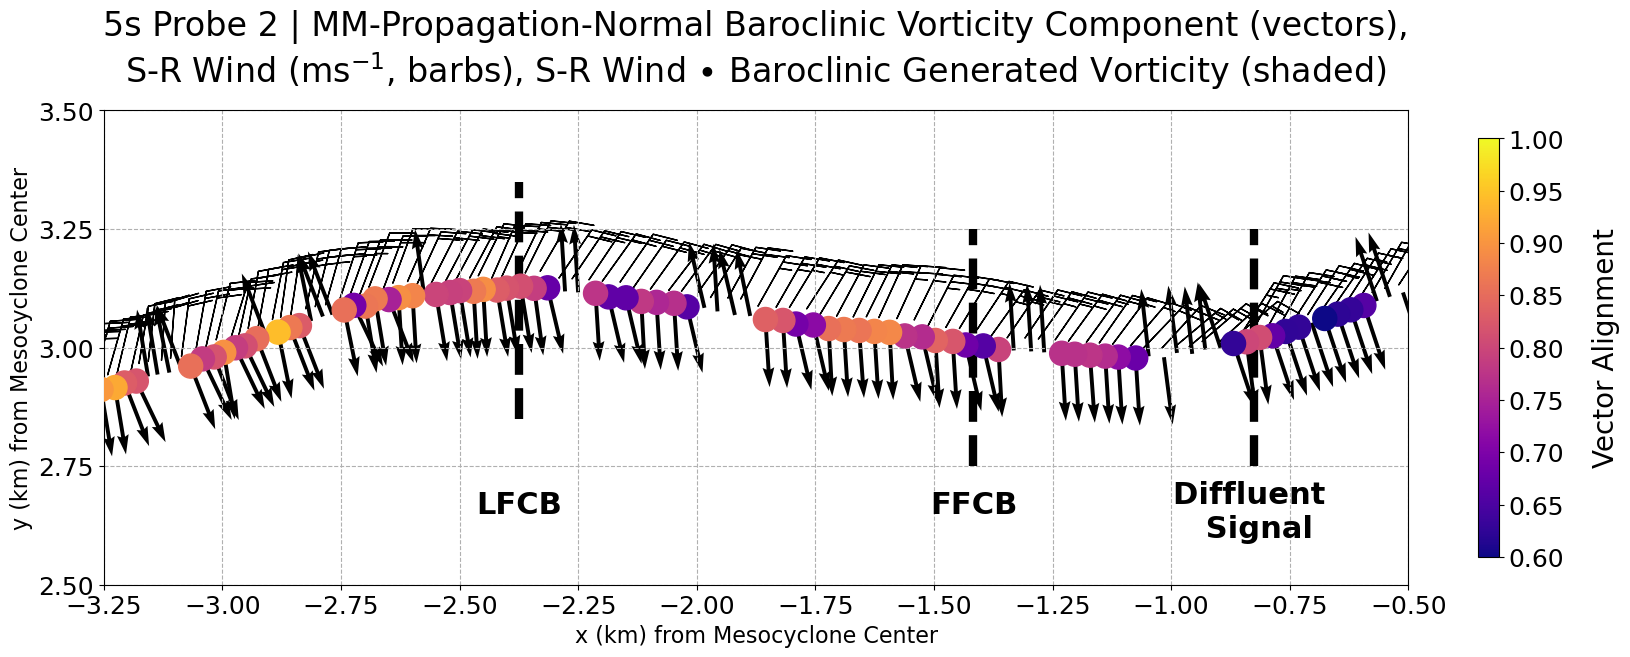

In [6]:
dot_product = []

for i in range(0, len(data), 1):
    dp = normalized_u_sr[i]*normalized_x_bgv[i] + normalized_v_sr[i]*normalized_y_bgv[i]
    dot_product.append(dp)

x_coords = data['Gradient Mean x']
y_coords = data['Gradient Mean y']
baro_x = data['BGV x_comp']
baro_y = data['BGV y_comp']
delta_theta_v = data['Delta Theta_v'].apply(lambda x: x.magnitude).to_numpy()
baro = (data['Baroclinic Generated Vorticity'].apply(lambda x: x.magnitude).to_numpy())*(10**6)

fig, ax = plt.subplots(figsize=(18, 8))
plt.axis('square')

plt.grid(True, linestyle = '--')
plt.xticks(np.arange(-3.25, -0.4, 0.25), size = 18)
plt.xlim([-3.25, -0.5])
plt.ylim([2.5, 3.5])
plt.yticks(np.arange(2.5, 3.6, 0.25), size = 18)

sub_paramter = 0.6
dot = np.array(dot_product)
dot_product = dot[dot>sub_paramter]
x_coords = x_coords[dot>sub_paramter]
y_coords = y_coords[dot>sub_paramter]
baro = baro[dot>sub_paramter]


plt.scatter(0, 0, c = 'black', marker = '*', s = 800)
scatter2 = plt.scatter(x_coords, y_coords, c = dot_product, s = 300, 
                      cmap = 'plasma', vmin = sub_paramter, vmax = 1, zorder = 5)

#cbar1 = plt.colorbar(scatter1, fraction=0.015)
cbar2 = plt.colorbar(scatter2, fraction=0.015)

sizes = {'width' : 0.3}
#cbar.ax.tick_params(labelsize=20)
x_coords = data['Gradient Mean x']
y_coords = data['Gradient Mean y']

for i in range(0, len(data), 1):
    stationplot = StationPlot(ax, data['x'][i], data['y'][i], fontsize = 22)
    stationplot.plot_barb(data['storm_rel_u'][i], data['storm_rel_v'][i], sizes = sizes)
    x = x_coords[i]
    y = y_coords[i]
    baro_x_i = baro_x[i]
    baro_y_i = baro_y[i]
    plt.quiver(x, y, 
               baro_x_i/np.abs(data['Baroclinic Generated Vorticity'][i]*4), 
               baro_y_i/np.abs(data['Baroclinic Generated Vorticity'][i]*4), width = 0.003, 
               angles = 'xy', scale_units = 'xy', scale = 1.75)

cbar2.set_label('Vector Alignment', size = 20, labelpad = 20)
cbar2.ax.tick_params(labelsize = 18)

plt.xlabel('x (km) from Mesocyclone Center', size = 16)
plt.ylabel('y (km) from Mesocyclone Center', size = 16)
plt.title(r'5s Probe 2 | MM-Propagation-Normal Baroclinic Vorticity Component '
          + r'(vectors),' + '\n' + 'S-R Wind (m$\mathregular{s^{-1}}$, barbs), '
          + r'S-R Wind $\bullet$ Baroclinic Generated Vorticity (shaded)'
          , size = 24, pad = 20)

plt.axvline(x = -0.825, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black')
plt.annotate('Diffluent \n Signal', xy = (-0.825, 2.65), xytext = (-0.825, 2.6), size = 22,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -1.4166666666666667, ymin = 0.25, ymax = 0.75, linestyle = 'dashed', linewidth = 6, color = 'black')
plt.annotate('FFCB', xy = (-1.4166666666666667, 2.65), xytext = (-1.4166666666666667, 2.65), size = 22,
             horizontalalignment = 'center', color = 'black', weight = 'bold')

plt.axvline(x = -2.375, ymin = 0.35, ymax = 0.85, linestyle = 'dashed', linewidth = 6, color = 'black')
plt.annotate('LFCB', xy = (-2.375, 2.65), xytext = (-2.375, 2.65), size = 22,
            horizontalalignment = 'center', color = 'black', weight = 'bold')